## Python statistics essential training - 04_02_confidenceintervals


Standard imports


In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
poll = pd.read_csv("./poll.csv")

In [6]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [8]:
poll.vote.value_counts(normalize=True)

vote
Brown    0.511
Green    0.489
Name: proportion, dtype: float64

In [13]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

run a same of 1000 voters


In [14]:
s = sample(0.51, n=1000)

In [15]:
s.vote.value_counts(normalize=True)

vote
Brown    0.521
Green    0.479
Name: proportion, dtype: float64

run a set of samples


In [16]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(
    normalize=True) for i in range(1000)])

In [17]:
dist.head()

vote,Green,Brown
proportion,0.502,0.498
proportion,0.506,0.494
proportion,0.501,0.499
proportion,0.466,0.534
proportion,0.514,0.486


<Axes: >

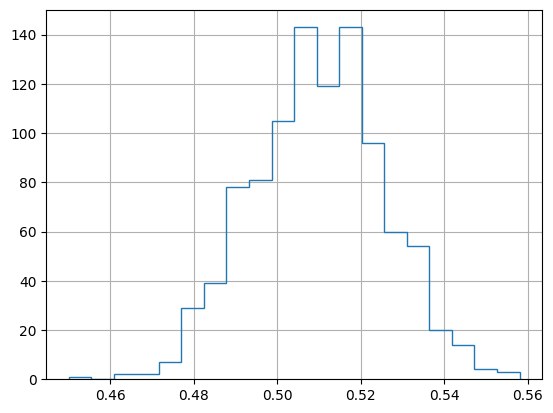

In [18]:
dist.Brown.hist(histtype="step", bins=20)

In [20]:
def samplingdist(brown, n=1000):
    return pd.DataFrame([sample(brown, n).vote.value_counts(normalize=True) for i in range(1000)])

In [21]:
def quantiles(brown, n=1000):
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [22]:
quantiles(0.50)

(0.469, 0.531)

In [24]:
quantiles(0.49)

(0.46, 0.524)

In [25]:
quantiles(0.52)

(0.487975, 0.553)

In [26]:
dist = samplingdist(0.50, 10000)

In [27]:
dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, proportion to proportion
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Green   1000 non-null   float64
 1   Brown   1000 non-null   float64
dtypes: float64(2)
memory usage: 23.4+ KB


In [28]:
dist.head()

vote,Green,Brown
proportion,0.5051,0.4949
proportion,0.4947,0.5053
proportion,0.5039,0.4961
proportion,0.4996,0.5004
proportion,0.5004,0.4996


<Axes: >

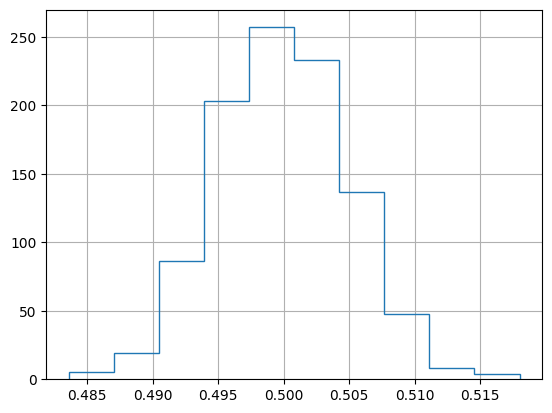

In [30]:
dist.Brown.hist(histtype="step", bins=10)

In [31]:
largepoll = pd.read_csv("./poll-larger.csv")

In [32]:
largepoll.vote.value_counts(normalize=True)

vote
Green    0.5181
Brown    0.4819
Name: proportion, dtype: float64

In [33]:
quantiles(0.5181)

(0.486, 0.549)